<div style="background-color: #b9deab; padding: 10px;">
    <h1 style="font-size: 24px;">Leaf Diameter Estimation with Linear Regression</h1>
</div>

*Research Explanation:*

   **The shape of grape leaves varies among different cultivars, and even within a single cultivar, leaf shapes can differ due to treatments and natural conditions. Moreover, the leaves of Vitis vinifera L. can have intricate shapes, making it challenging to quickly and accurately measure their diameters in the field. While length and width can be easily measured with a ruler, determining the precise points for measuring the diameter can be difficult. Measuring the diameters of a large number of leaves with a ruler is a time-consuming process that often leads to mistakes.**
   
   **All parameters of leaves were manually measured for this experiment. Development of a simple linear regression model with an equation that is easy to use, comprehend, and apply is needed for researchers working with plants. This equation will be used for calculating leaf diameter basing on leaf length and width.** 
   
   *Aim:*
   
   **to predict the diameters of Vitis vinifera L. cv Pinot noir leaves cultivated in the Odesa region basing on their length and width.**

<div style="background-color: #E8F4E3; padding: 10px;">
    <h1 style="font-size: 18px;">Importing Modules</h1>
</div>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate

import warnings
warnings.filterwarnings("ignore")

<div style="background-color: #E8F4E3; padding: 10px;">
    <h1 style="font-size: 18px;">Data Reading and Initial Description</h1>
</div>

**Explanation of Column Names:**
- **leaf_length**: Length of the longest part of a leaf in cm
- **leaf_width**: Width of the widest part of a leaf in cm
- **leaf_diam**: Diameter of a leaf in cm

In [2]:
# Read the data file
leaves = pd.read_csv(r'C:\Users\liman\Documents\My Data Science\ready to use diam leaf reg\grape_leaf_morphology.csv')
leaves.head(3)

leaf_length  leaf_width  leaf_diam
0          2.0         2.5        2.2
1          3.2         4.0        3.6
2          4.7         6.0        5.0

In [3]:
leaves.shape

(1482, 3)

In [4]:
# Count the number of missing values in each column
missing_values = leaves.isna().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
leaf_length    0
leaf_width     0
leaf_diam      0
dtype: int64


In [5]:
leaves.describe()

leaf_length   leaf_width    leaf_diam
count  1482.000000  1482.000000  1482.000000
mean      2.379757     2.846356     2.916059
std       1.154790     1.409332     1.486468
min       0.500000     0.700000     0.800000
25%       1.500000     2.000000     1.900000
50%       2.100000     2.500000     2.500000
75%       3.000000     3.500000     3.500000
max       8.300000     9.600000     9.500000

<div style="background-color: #b9deab; padding: 10px;">
    <h1 style="font-size: 20px;">EDA of Leaf Morphology Dataset</h1>
</div>

<div style="background-color: #E8F4E3; padding: 10px;">
    <h1 style="font-size: 18px;">Pairwise Relationships of the Features</h1>
</div>

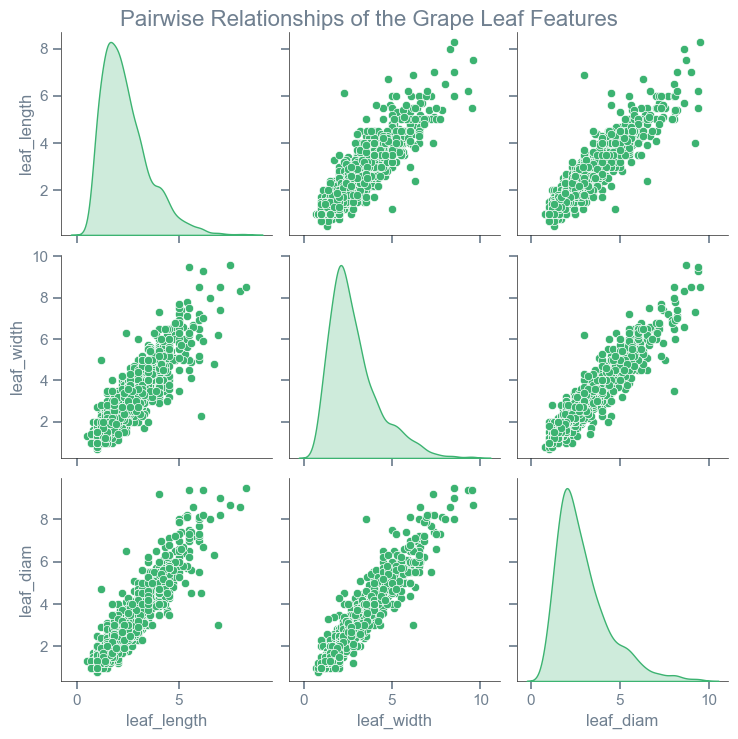

In [6]:
# Set the plot style
sns.set(
        style='ticks', 
        color_codes=True, 
        rc={'axes.linewidth': 0.5, 
            'xtick.color': 'slategray', 
            'ytick.color': 'slategray', 
            'axes.labelcolor': 'slategray'}
)

# Create a pairplot 
sns.pairplot(
             leaves, 
             diag_kind='kde', 
             plot_kws={'color': 'mediumseagreen'}, 
             diag_kws={'color': 'mediumseagreen'}
)

plt.suptitle(
             'Pairwise Relationships of the Grape Leaf Features', 
             fontsize=16, 
             color='slategray'
)

# Adjust the spacing between the plots and the suptitle
plt.subplots_adjust(top=0.95);

<div style="background-color: #E8F4E3; padding: 10px;">
    <h1 style="font-size: 18px;">Heat Map of the Leaf Features</h>
</div>

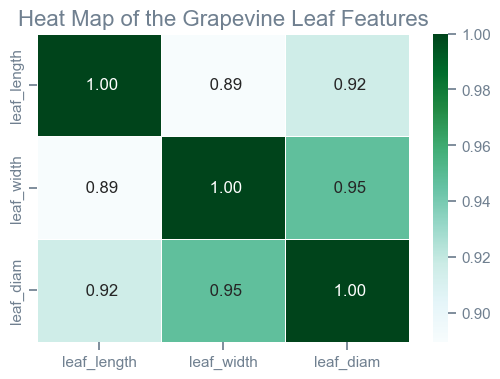

In [7]:
# Calculate the correlation matrix with Pearson coefficients
correlation_matrix=leaves.corr()

# Set the color style
cmap=sns.color_palette('BuGn', as_cmap=True)

# Create the heat map
plt.figure(figsize=(6, 4))

sns.heatmap(
    correlation_matrix, 
    cmap=cmap, 
    annot=True, 
    fmt=' .2f', 
    linewidths=0.5
)

plt.title('Heat Map of the Grapevine Leaf Features', fontsize=16, color='slategray');

<div style="background-color: #E8F4E3; padding: 10px;">
    <h1 style="font-size: 18px;">Scatter Plots with Regression Lines and Correlation Coefficients Annotations</h>
</div>

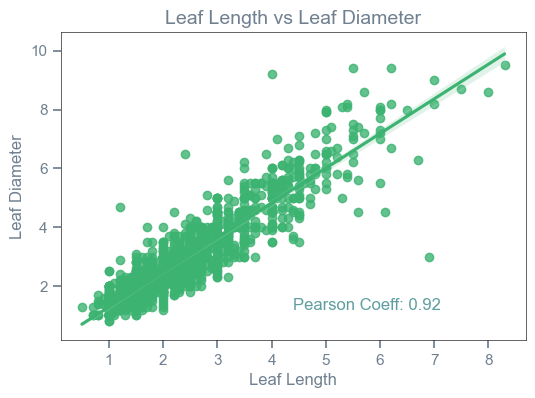

In [8]:
# Sample data from leaves df
x = leaves['leaf_length']
y = leaves['leaf_diam']
data = pd.concat([x, y], axis=1)
  
# Extract values
x = data['leaf_length'].values
y = data['leaf_diam'].values
   
# Calculate Pearson correlation coefficient
correlation_coefficient = np.corrcoef(x, y)[0, 1]
 
# Create scatter plot with regression line 
plt.figure(figsize=(6, 4))

sns.regplot(x=x, y=y, color='mediumseagreen')
   
# Add text annotation for the correlation coefficient
plt.annotate(
        f'Pearson Coeff: {correlation_coefficient:.2f}',
        xy=(0.5, 0.1), 
        xycoords='axes fraction', 
        fontsize=12, color='cadetblue'
)
   
plt.title('Leaf Length vs Leaf Diameter', fontsize=14, color='slategray')
plt.xlabel('Leaf Length')
plt.ylabel('Leaf Diameter');

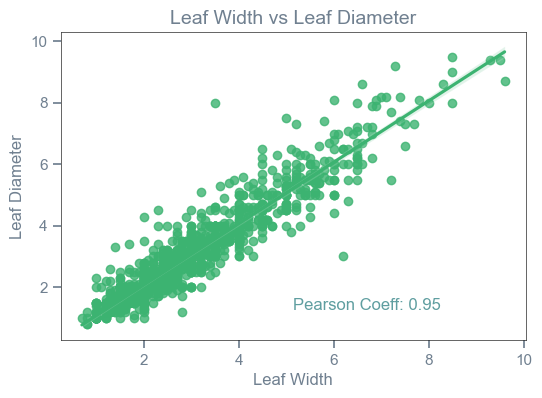

In [9]:
# Sample data from leaves df
x = leaves['leaf_width']
y = leaves['leaf_diam']
data = pd.concat([x, y], axis=1)
   
# Extract values
x = data['leaf_width'].values
y = data['leaf_diam'].values
   
# Calculate Pearson correlation coefficient
correlation_coefficient = np.corrcoef(x, y)[0, 1]
 
# Create scatter plot with regression line 
plt.figure(figsize=(6, 4))

sns.regplot(x=x, y=y, color='mediumseagreen')
   
# Add text annotation for the correlation coefficient
plt.annotate(
    f'Pearson Coeff: {correlation_coefficient:.2f}',
    xy=(0.5, 0.1), 
    xycoords='axes fraction', 
    fontsize=12, color='cadetblue'
)
   
plt.title('Leaf Width vs Leaf Diameter', fontsize=14, color='slategray')
plt.xlabel('Leaf Width')
plt.ylabel('Leaf Diameter');

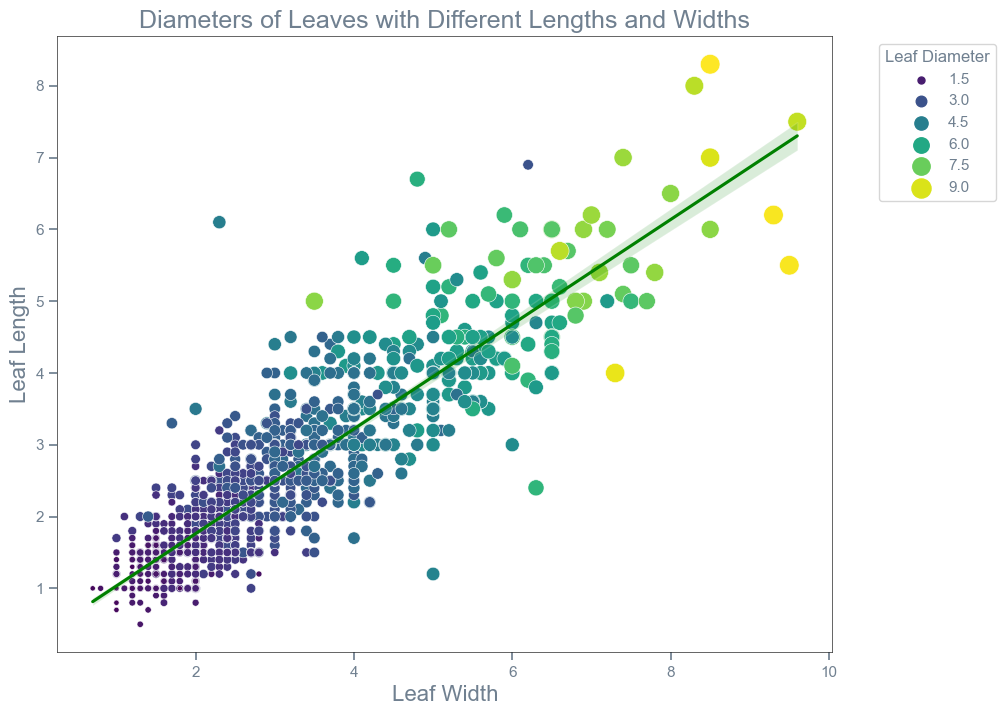

In [10]:
# Create a scatter plot with variable bubble sizes
plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=leaves, 
    x='leaf_width', 
    y='leaf_length', 
    size='leaf_diam', 
    sizes=(10, 200), 
    hue='leaf_diam', 
    palette='viridis'
)

# Add a regression line
sns.regplot(
    data=leaves,     
    x='leaf_width', 
    y='leaf_length', 
    scatter=False, 
    color='green'
)

plt.xlabel('Leaf Width', fontsize=16, color='slategray')
plt.ylabel('Leaf Length', fontsize=16, color='slategray')

plt.title(
    'Diameters of Leaves with Different Lengths and Widths', 
    fontsize=18, 
    color='slategray'
)

# Set the legend
l = plt.legend(title='Leaf Diameter', bbox_to_anchor=(1.05, 1), loc='upper left')
l.get_title().set_color('slategray')  # Set title text color
for text in l.get_texts():
    text.set_color('slategray');  # Set legend text color

<div style="background-color: #E8F4E3; padding: 10px;">
    <h1 style="font-size: 18px;">Characterization of the Target Feature: Leaf Diameter</h>
</div>

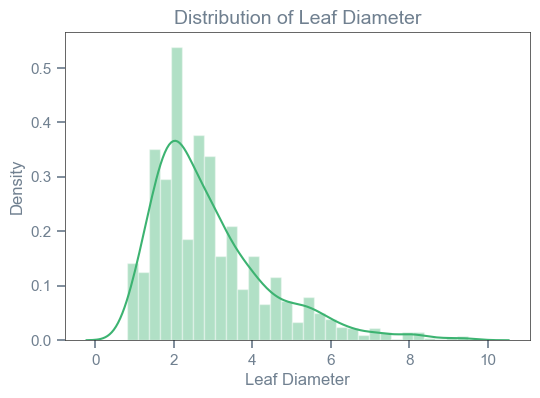

In [11]:
# Create a KDE plot of the target feature - leaf diameter
  
plt.figure(figsize=(6, 4))

sns.distplot(leaves['leaf_diam'], color='mediumseagreen')
 
plt.title('Distribution of Leaf Diameter', fontsize=14, color='slategray')
plt.xlabel('Leaf Diameter', fontsize=12)
plt.ylabel('Density', fontsize=12);

**CONCLUSIONS from the visualizations:**

- **The geometry of Pinot noir leaves cultivated in the Odesa region shows a clear correlation between leaf length and leaf diameter (Pearson's coefficient is 0.92), as well as between leaf width and leaf diameter (Pearson's coefficient is 0.95). There is also a high correlation between length and width (0.89). This accurate shape of the leaves enables the development of a simple linear regression model.**
   
   
- **The KDE plot of leaf diameters exhibits a long right tail, indicating the presence of some leaf outliers with larger diameters.**

<div style="background-color: #b9deab; padding: 10px;">
    <h1 style="font-size: 24px;">ML Linear Regression</h> 
</div>

<div style="background-color: #E8F4E3; padding: 10px;">
    <h1 style="font-size: 18px;">Data Preparation, Model Training, and Evaluation</h>
</div>

In [3]:
# Shuffle the dataset 
leaves_shuffled = leaves.sample(frac=1, random_state=42)  

In [13]:
#!We'll not scale the data because they are already on one scale: both length and width are in cm

In [5]:
# Separate features (X) and target variable (y) 
X = leaves_shuffled.drop(columns=['leaf_diam']) 
y = leaves_shuffled['leaf_diam']

# Split the data 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [6]:
# Create a list of regression models
models = [LinearRegression(), Ridge(alpha=1), Lasso(alpha=1.0)]

# Create list to store the results
results = []

# Create list to store the trained models
trained_models = []

# Loop through each model
for model in models:
    model_name = model.__class__.__name__
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Perform cross-validation and calculate scores on the training set
    cv_scores_r2_train = cross_val_score(
        model, 
        X_train, 
        y_train, 
        cv=5, 
        scoring='r2
    )
    
    cv_scores_mae_train = -cross_val_score(
        model, 
        X_train, 
        y_train, 
        cv=5,
        scoring='neg_mean_absolute_error'
    )
    
    cv_scores_mse_train = -cross_val_score(
        model, 
        X_train, 
        y_train,
        cv=5, 
        scoring='neg_mean_squared_error'
    )

    cv_scores_rmse_train = np.sqrt(cv_scores_mse_train)

    # Calculate means of the scores on the training set
    mean_r2_train = np.mean(cv_scores_r2_train)
    mean_mae_train = np.mean(cv_scores_mae_train)
    mean_mse_train = np.mean(cv_scores_mse_train)
    mean_rmse_train = np.mean(cv_scores_rmse_train)

    # Fit the model on the entire training set
    model.fit(X_train, y_train)

    # Evaluate the model on the validation set
    y_val_pred = model.predict(X_val)

    # Calculate scores on the validation set
    r2_val = r2_score(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mse_val = mean_squared_error(y_val, y_val_pred)
    rmse_val = np.sqrt(mse_val)

    # Append results to the list
    results.append({
        'Model': model_name,
        'Train R^2': mean_r2_train,
        'Validation R^2': r2_val,
        'Train MAE': mean_mae_train,
        'Validation MAE': mae_val,
        'Train MSE': mean_mse_train,
        'Validation MSE': mse_val,
        'Train RMSE': mean_rmse_train,
        'Validation RMSE': rmse_val
    })

    # Append the trained model to the list
    trained_models.append(model)
    
# Create a DataFrame to store the results
results_df = pd.DataFrame(results)
results_df

Model  Train R^2  Validation R^2  Train MAE  Validation MAE  \
0  LinearRegression   0.923592        0.918544   0.285155        0.286363   
1             Ridge   0.923597        0.918553   0.285142        0.286352   
2             Lasso   0.660593        0.664246   0.646540        0.660559   

   Train MSE  Validation MSE  Train RMSE  Validation RMSE  
0   0.168883        0.186302    0.405032         0.431627  
1   0.168877        0.186282    0.405020         0.431604  
2   0.746386        0.767916    0.857337         0.876308

**CONCLUSIONS from model evaluation on train and validation datasets:**

- **Linear Regression and Ridge Regression exhibited almost the same results when evaluated, so for further work, Linear Regression will be selected. The MAE metric was sufficiently low on both the validation and training sets.** 


- **Lasso Regression was not appropriate for this dataset.**
   

<div style="background-color: #E8F4E3; padding: 10px;">
    <h1 style="font-size: 18px;">Testing the Model on Independent Test Dataset</h1>
</div>

In [18]:
# Load and read the test data
test = pd.read_csv(r'C:\Users\liman\Documents\My Data Science\ready to use diam leaf reg\test_data_grape_diam.csv')
test.head(3)

leaf_length  leaf_width  leaf_diam
0          2.0         2.4        2.5
1          3.7         5.6        5.7
2          5.0         5.2        5.8

In [19]:
test.shape

(494, 3)

In [20]:
# Separate the data
X_test = test[['leaf_length', 'leaf_width']]
y_test = test['leaf_diam']

In [21]:
# Extract the Linear Regression model from the list of trained models
lin_reg_model = trained_models[0]

# Use the trained model for predictions on test dataset
y_pred_test = lin_reg_model.predict(X_test)

# Evaluate the best model on the test set
test_score = lin_reg_model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print("Model:", lin_reg_model)
print("Test score:", test_score)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Model: LinearRegression()
Test score: 0.9218183971203304
MAE: 0.2870700412579923
MSE: 0.17754176184341508
RMSE: 0.4213570479337151


In [22]:
# Add  y_pred columns to the test df
test['diameter_pred'] = y_pred_test
test.head(3)

leaf_length  leaf_width  leaf_diam  diameter_pred
0          2.0         2.4        2.5       2.447317
1          3.7         5.6        5.7       5.363560
2          5.0         5.2        5.8       5.703939

<div style="background-color: #E8F4E3; padding: 10px;">
    <h1 style="font-size: 18px;">Visualization of Test and Predicted Leaf Diameters</h1>
</div>

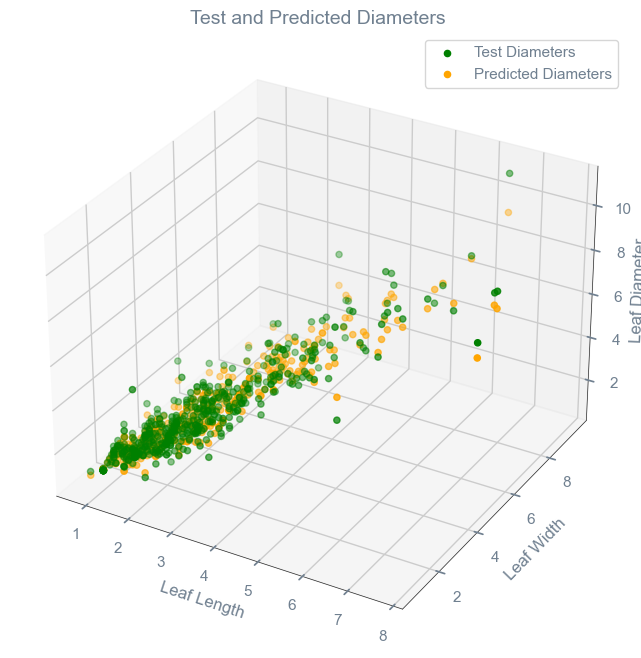

In [23]:
# Create a 3D scatter plot 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the test points ('leaf_diam')
ax.scatter(
    X_test['leaf_length'], 
    X_test['leaf_width'], 
    y_test, 
    c='green', 
    label='Test Diameters'
)

# Scatter plot of the predicted points
ax.scatter(
    X_test['leaf_length'], 
    X_test['leaf_width'], 
    y_pred_test, 
    c='orange', 
    label='Predicted Diameters'
)

# Set labels for the axes
ax.set_xlabel('Leaf Length')
ax.set_ylabel('Leaf Width')
ax.set_zlabel('Leaf Diameter', color='slategray', labelpad=0.01, fontsize=12)

# Set title and legend
ax.set_title('Test and Predicted Diameters', color='slategray', fontsize=14)
ax.legend()

# Change the legend text color to slategray
legend = ax.legend()
for text in legend.get_texts():
    text.set_color('slategray');

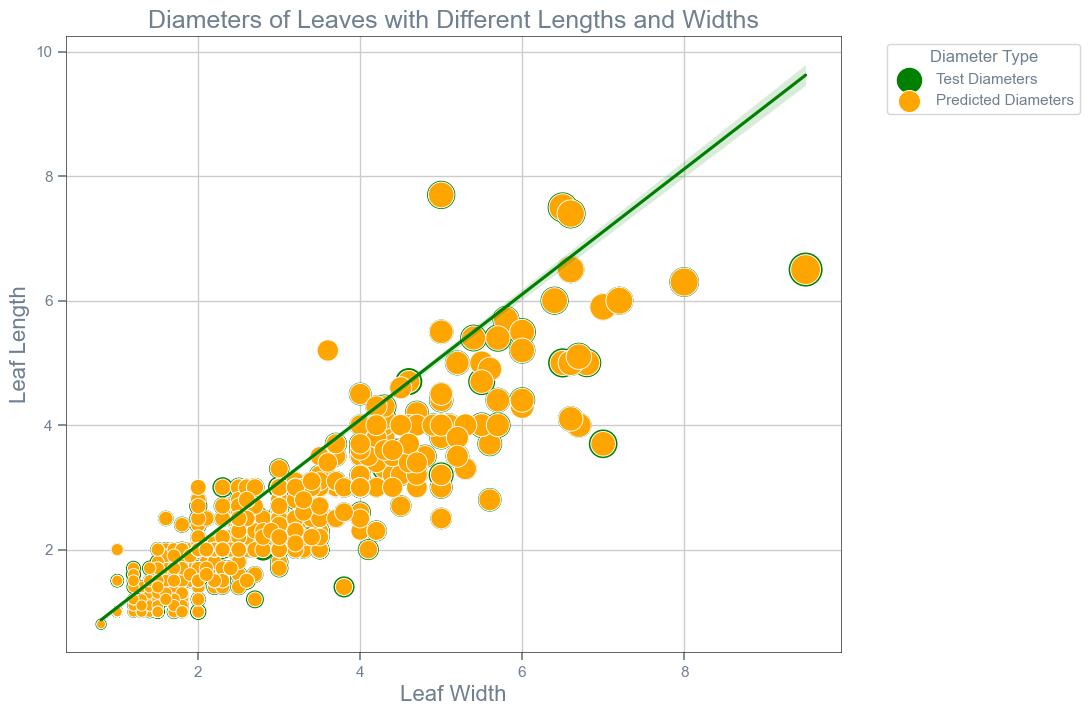

In [24]:
# Create a bubble plot with y_test ('leaf_diam') and y_pred determining bubble sizes

plt.figure(figsize=(10, 8))

# Scatter plot for test values
scatter_test = plt.scatter(
    test['leaf_width'], 
    test['leaf_length'], 
    s=50 * test['leaf_diam'],  # Column that determines the size
    c='green',                 # Color for test values
    label='Test Diameters'
)

# Scatter plot for predicted values
scatter_pred = sns.scatterplot(
    data=test, 
    x='leaf_width', 
    y='leaf_length', 
    s=50 * test['diameter_pred'],  # Column that determines the size
    c='orange',                    # Color for predicted values
    label='Predicted Diameters'
)

# Add a regression line 
sns.regplot(
    data=test,     
    x='leaf_width', 
    y='diameter_pred',    
    scatter=False, 
    color='green'
)

plt.xlabel('Leaf Width', fontsize=16, color='slategray')
plt.ylabel('Leaf Length', fontsize=16, color='slategray')

plt.title(
    'Diameters of Leaves with Different Lengths and Widths', 
    fontsize=18, 
    color='slategray'
)

# Set the legend
l = plt.legend(title='Diameter Type', bbox_to_anchor=(1.05, 1), loc='upper left')
l.get_title().set_color('slategray')  
for text in l.get_texts():
    text.set_color('slategray')  

plt.grid(True)

In [25]:
# Create an interactive 3D plot with explanations for each value when pointed to with a cursor

# Create a DataFrame for visualization
viz_data = pd.DataFrame({
    'leaf_length': X_test['leaf_length'],
    'leaf_width': X_test['leaf_width'],
    'y_test': y_test,
    'y_pred_test': y_pred_test
})

# Create a 3D scatter plot  
fig = px.scatter_3d(
    viz_data, 
    x='leaf_length', 
    y='leaf_width', 
    z='y_test', 
    color='y_test', 
    color_continuous_scale='Viridis'
)

fig.add_trace(
    px.scatter_3d(
        viz_data, 
        x='leaf_length', 
        y='leaf_width', 
        z='y_pred_test', 
        color='y_pred_test', 
        color_continuous_scale='Viridis'
    ).data[0]
)

# Set the marker size
fig.update_traces(marker=dict(size=5))

# Update layout settings
fig.update_layout(
    scene=dict(
        aspectmode='data',
        aspectratio=dict(x=1, y=1, z=0.3),
        xaxis_title='Leaf Length',
        yaxis_title='Leaf Width',
        zaxis_title='Leaf Diameter'
    )
)

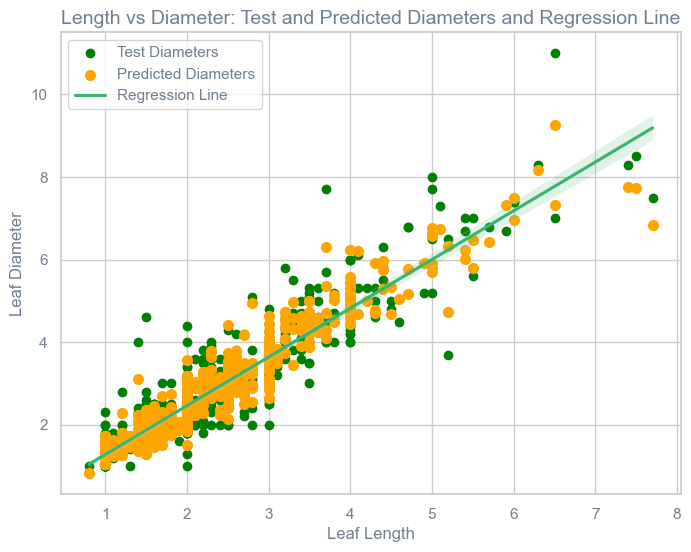

In [26]:
# To show test and prediction diameters in 2D, two plots (for each feature) showing diameters 
# vs Lenght and vs Width will be created:

# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Scatter plot of the test values
plt.scatter(
    X_test['leaf_length'], 
    y_test, 
    color='green', 
    label='Test Diameters'
)

# Scatter plot for the predicted values
plt.scatter(
    X_test['leaf_length'], 
    y_pred_test, 
    color='orange', 
    linewidth=2, 
    label='Predicted Diameters'
)

# Regression line
sns.regplot(
    x=X_test['leaf_length'], 
    y=y_pred_test, 
    color='mediumseagreen', 
    scatter=False, 
    label='Regression Line'
)

plt.xlabel('Leaf Length', color = 'slategray')
plt.ylabel('Leaf Diameter', color = 'slategray')
plt.title(
    'Length vs Diameter: Test and Predicted Diameters and Regression Line', 
    color = 'slategray', 
    fontsize = 14
)

plt.legend()

# Change the legend text color to slategray
legend = plt.legend()
for text in legend.get_texts():
    text.set_color('slategray')
    
# Change the color of xticks and yticks
plt.tick_params(axis='x', colors='slategray')
plt.tick_params(axis='y', colors='slategray')

plt.grid(True);

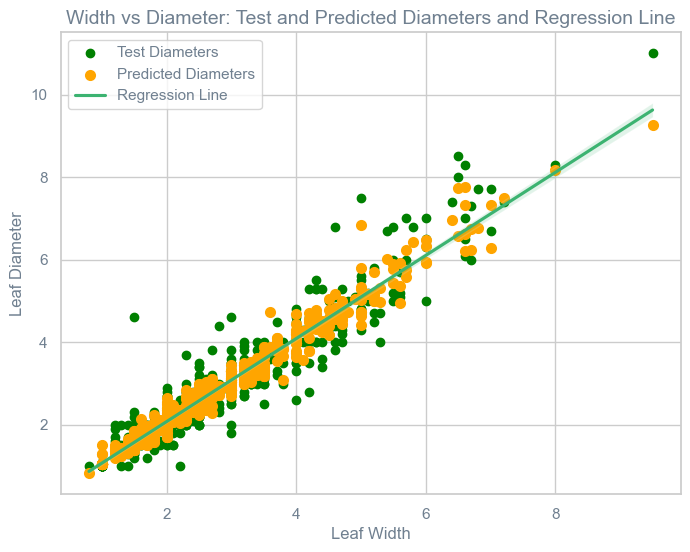

In [27]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Scatter plot of the test values
plt.scatter(
    X_test['leaf_width'], 
    y_test, 
    color='green', 
    label='Test Diameters'
)

# Scatter plot for the predicted values
plt.scatter(
    X_test['leaf_width'], 
    y_pred_test, 
    color='orange', 
    linewidth=2, 
    label='Predicted Diameters'
)

# Regression line
sns.regplot(
    x=X_test['leaf_width'], 
    y=y_pred_test, 
    color='mediumseagreen', 
    scatter=False, 
    label='Regression Line'
)

plt.xlabel('Leaf Width', color = 'slategray')
plt.ylabel('Leaf Diameter', color = 'slategray')
plt.title(
    'Width vs Diameter: Test and Predicted Diameters and Regression Line', 
    color = 'slategray', 
    fontsize = 14
)

plt.legend()

# Change the legend text color to slategray
legend = plt.legend()
for text in legend.get_texts():
    text.set_color('slategray')
    
# Change the color of xticks and yticks
plt.tick_params(axis='x', colors='slategray')
plt.tick_params(axis='y', colors='slategray')

plt.grid(True);

**CONCLUSIONS from model testing on independend dataset:**

- **Metrics for the test (independent) dataset were almost identical to those for the training and validation datasets. This confirms the viability of using the Linear Regression model for further calculations of leaf diameters.**


- **The most notable differences were observed for outliers - leaves that were significantly larger than the others. In these cases (as seen in the visualizations), predicted values were usually lower than the test ones. However, for non-outlier values, the predictions were very close to reality, a fact supported by subsequent metrics and visualizations.** 

In [ ]:
# Save the trained model for further use
with open('diameter_leaves_lin_reg.pkl', 'wb') as model_file:
    pickle.dump(lin_reg_model, model_file)

<div style="background-color: #E8F4E3; padding: 10px;">
    <h1 style="font-size: 18px;">Equation for Easy Diameter Calculation </h1>
</div>

In [28]:
# Equation of the Linear Regression
c=lin_reg_model.coef_
c

array([0.46605571, 0.66373403])

In [29]:
b=lin_reg_model.intercept_
b

-0.0777565732892258

In [30]:
equation = f"y = {round(c[0], 2)}*x1 + {round(c[1], 2)}*x2 + {round(b, 2)}"
equation

'y = 0.47*x1 + 0.66*x2 + -0.08'

<div style="background-color: #E8F4E3; padding: 10px;">
    <h1 style="font-size: 16px;">Equation for Grape Leaf Diameter Calculation:</h1>
    <p>$$ \text{leaf_diameter} = 0.47 \cdot \text{leaf_length} + 0.66 \cdot \text{leaf_width} - 0.08 $$</p>
</div>

<div style="background-color: #b9deab; padding: 20px; border-radius: 10px; box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.2);">
    <h1 style="font-size: 20px; margin-bottom: 10px;"><u>CONCLUSIONS:</h1>
    <p style="font-size: 14px; line-height: 1.5;">
        <b> - A Linear Regression model with MAE 0.28 - 0.29 on train, validation and independend test datasets was developed for prediction of leaf diameters of Pinot noir cultivated in Odesa region. 
        <br><br>
        <b> - An equation was derived from the model, allowing for the rapid calculation of leaf diameter based on the measurements of leaf length and leaf width.
        <br><br>
        <b> - The obtained model and equation will allow to speed up the field measurements of leaves: only lengths and widths will be measured allowing to reduce time of field work. 
    </p>
</div>